# Web Scraping using Python (Beautiful Soup)

**Web scraping is a term used to describe the use of a program or algorithm to extract and process large amounts of data from the web.**


Let's say you find data from the web, and there is no direct way to download it, web scraping using Python is a skill you can use to extract the data into a useful form that can be imported.

Beautiful Soup is a Python library used for web scraping purposes to pull the data out of HTML and XML files. It provides Pythonic idioms for iterating, searching, and modifying the parse tree, which is useful for extracting information from web pages.

### What are we going to do in this session-

- Data extraction from the web using Python's Beautiful Soup module  
- Data manipulation and cleaning using Python's Pandas library  
- Data visualization using Python's Matplotlib library

The dataset we will use is taken from a 10K race that took place in Hillsboro, OR on June 2017. Specifically, you will analyze the performance of the 10K runners and answer questions such as:

**Question 1** What was the average finish time for the runners?  
**Question 2** Did the runners finish time follow a normal distribution?  
**Question 3** Were there any performance differences between males and females?

Using Jupyter Notebook, we should start by importing the necessary modules (pandas, numpy, matplotlib.pyplot, seaborn). 

In [1]:
pip install beautifulsoup4


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


To perform web scraping, you should also import the libraries shown below.   

- The urllib.request module is used to open URLs. 
- The Beautiful Soup package is used to extract data from html files. 
The Beautiful Soup library's name is bs4 which stands for Beautiful Soup, version 4.

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup


After importing necessary modules, you should specify the URL containing the dataset and pass it to urlopen() to get the html of the page.

In [4]:
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url) # Open the URL and get the HTML content


Getting the html of the page is just the first step. Next step is to create a Beautiful Soup object from the html. This is done by passing the html to the BeautifulSoup() function.   
The Beautiful Soup package is used to parse the html, that is, take the raw html text and break it into Python objects. The second argument 'lxml' is the html parser.

(An HTML parser is a program or module that is responsible for interpreting and processing HTML code. Its primary function is to read HTML documents and transform them into a structure that can be easily navigated and manipulated by a program or script.)

In [5]:
soup = BeautifulSoup(html, 'lxml')

#This line returns the type of the soup object, which is a bs4.BeautifulSoup object

type(soup)


bs4.BeautifulSoup

The soup object allows you to extract interesting information about the website you're scraping such as getting the title of the page as shown below.

In [6]:
# Get the title
title = soup.title
print(title)


<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>


You can also get the text of the webpage and quickly print it out to check if it is what you expect.




In [7]:
# Print out the text
text = soup.get_text()
print(soup.text)









Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!





















 2017 Intel Great Place to Run 10K \ Urban Clash Games
 Hillsboro Stadium, Hillsboro, OR 
 June 2nd, 2017


                            





 Email
                        timing@hubertiming.com with results questions. Please include your bib number if you have it.


                    






Huber Timing Home





10K:


Finishers:
577


Male:
414


Female:
163










 5K Individual
 5K Team
 10K Individual
 10K Team
 Summary




Indvidual Results



10K Results



Search:

Search
Division:

Men
Women
Non-Binary
Masters Men
Masters Women
Masters Non-Binary

F 18-25
F 26-35
F 36-45
F 46-55
F Under 18
M 18-25
M 26-35
M 36-45
M 46-55
M 55+
M Under 18
 Team:

Unattached
COLUMBIA TEAM A
COLUMBIA TEAM B
COLUMBIA TEAM C
COLUMBIA TEAM D
COLUMBIA TEAM E
DTNA1
DTNA2
DTNA3
FXG1
INTEL TEAM A
INTEL TEAM B
INTEL TEAM C
INTEL TEAM D
INTEL TEAM E
INTEL TEAM F
INTEL TEAM G
INTEL TEAM H
INTEL TEAM I

You can use the find_all() method of soup to extract useful html tags within a webpage. Examples of useful tags include < a > for hyperlinks, < table > for tables, < tr > for table rows, < th > for table headers, and < td > for table cells. The code below shows how to extract all the hyperlinks within the webpage.



In [8]:
soup.find_all('a')


[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com">Huber Timing Home</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 5K Individual</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 5K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 10K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>,
 <a id="individual" name="individual"></a>,
 <a data-url="/results/2017GPTR10K" href="#tabs-1" id="rootTab" style="font-size: 18px">10K Results</a>,
 <a href="https://www.hubertiming.com/"><img

As you can see from the output above, html tags sometimes come with attributes such as class, src, etc. These attributes provide additional information about html elements. You can use a for loop and the get('"href") method to extract and print out only hyperlinks.




In [9]:
#here we use the BeautifulSoup library in Python to extract all the links (HTML anchor tags) from a webpage.

# find_all() method of the soup object to find all the anchor tags ( tags) in the HTML document and stores them 
#in the all_links variable.

all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

#the get() method is used to extract the value of the href attribute, which contains the URL that the link points to.

mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2017GPTR
/results/team/2017GPTR
/results/team/2017GPTR10K
/results/summary/2017GPTR10K
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None


To print out table rows only, pass the 'tr' argument in soup.find_all().




- The soup.find_all('tr') function finds all the HTML table rows () in the webpage and stores them in the rows variable.
- The print(rows[:10]) statement then prints the first 10 rows of the table for a sanity check, allowing the user to verify that the data has been scraped correctly.

In [10]:
# Print the first 10 rows for sanity check
rows = soup.find_all('tr')
print(rows[:10])


[<tr colspan="2">
<b>10K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>577</td>
</tr>, <tr>
<td>Male:</td>
<td>414</td>
</tr>, <tr>
<td>Female:</td>
<td>163</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Time</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr data-bib="814">
<td>1</td>
<td>814</td>
<td>

                    JARED WILSON

                </td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>36:21</td>
<td>36:24</td>
<td></td>
</tr>, <tr data-bib="573">
<td>2</td>
<td>573</td>
<td>

                    NATHAN A SUSTERSIC

                </td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>36:42</td>
<td>36:45</td>
<td>
<img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>
                            INTEL TEAM F
                        </td>
</tr>, <tr data-bib="687">
<td>3</td>
<td>687</td>
<td>

                    FRANCISCO MAYA

           

Our goal here is to take a table from a webpage and convert it into a dataframe for easier manipulation using Python. To get there, you should get all table rows in list from first and then convert that list into a dataframe. Below is a for loop that iterates through table rows and prints out the cells of the rows.

 The for loop iterates through each row in the rows variable.  
• For each row, the find_all() method is used to find all the td elements within that row.  
• The resulting list of td elements is stored in the row_td variable.  
• After the loop completes, the last value of row_td is printed using the print() function.  
• Finally, the type() function is used to determine the data type of row_td.  
• Note that if there are multiple rows in the rows variable, only the td elements from the last row will be stored in row_td.  
• If you want to store all the td elements from all the rows, you would need to append each row_td list to a larger list outside the loop.  

In [11]:
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)


[<td>577</td>, <td>443</td>, <td>

                    LIBBY B MITCHELL

                </td>, <td>F</td>, <td>HILLSBORO</td>, <td>OR</td>, <td>1:41:18</td>, <td>1:42:10</td>, <td></td>]


bs4.element.ResultSet

The output above shows that the row is printed with html tags embedded in each row. This is not what you want. You can use remove the html tags using Beautiful Soup or regular expressions.

The easiest way to remove html tags is to use Beautiful Soup, and it takes just one line of code to do this. Pass the string of interest into BeautifulSoup() and use the get_text() method to extract the text without html tags.

In [12]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)


[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 1:42:10, ]


Using regular expressions is highly discouraged since it requires several lines of code and one can easily make mistakes. It requires importing the re (for regular expressions) module. The code below shows how to build a regular expression that finds all the characters inside the < td > html tags and replace them with an empty string for each table row. First, you compile a regular expression by passing a string to match to re.compile(). The dot, star, and question mark (.*?) will match an opening angle bracket followed by anything and followed by a closing angle bracket. It matches text in a non-greedy fashion, that is, it matches the shortest possible string. If you omit the question mark, it will match all the text between the first opening angle bracket and the last closing angle bracket. After compiling a regular expression, you can use the re.sub() method to find all the substrings where the regular expression matches and replace them with an empty string. The full code below generates an empty list, extract text in between html tags for each row, and append it to the assigned list.




In [13]:
#imports the regular expression module re.
import re

#initializes an empty list called list_rows.
list_rows = []
for row in rows:  # loops through each row in a variable called rows.
    cells = row.find_all('td') #For each row, it finds all the td elements within it using the find_all() method.
    str_cells = str(cells) #converts the cells object to a string using the str() function and assigns it to a variable called str_cells.
    clean = re.compile('<.*?>') # compiles a regular expression pattern to match any text between < and > using the re.compile() method and assigns it to a variable called clean.
    clean2 = (re.sub(clean, '',str_cells)) # re.sub() method to replace any matches of this pattern in str_cells with an empty string, and assigns the result to a variable called clean2.
    list_rows.append(clean2) #appends clean2 to the list_rows list and prints clean2.
print(clean2) # prints the data type of clean2 using the type() function.
type(clean2)


[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 1:42:10, ]


str

The next step is to convert the list into a dataframe and get a quick view of the first 10 rows using Pandas.




In [14]:
df = pd.DataFrame(list_rows)
df.head(10)


,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, \r\n\r\n JARED WIL..."
6,"[2, 573, \r\n\r\n NATHAN A ..."
7,"[3, 687, \r\n\r\n FRANCISCO..."
8,"[4, 623, \r\n\r\n PAUL MORR..."
9,"[5, 569, \r\n\r\n DEREK G O..."


## Data Manipulation and Cleaning


The dataframe is not in the format we want. To clean it up, you should split the "0" column into multiple columns at the comma position. This is accomplished by using the str.split() method.




In [15]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)


,0,1,2,3,4,5,6,7,8
0,[],None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None
5,[1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,[2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,[3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,[4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,[5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [40]:
df1[0] = df1[0].str.strip('[')
df1.head(10)


,0,1,2,3,4,5,6,7,8
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


The table is missing table headers. You can use the find_all() method to get the table headers.




In [17]:
col_labels = soup.find_all('th')


Similar to table rows, you can use Beautiful Soup to extract text in between html tags for table headers.




In [18]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)


['[Place, Bib, Name, Gender, City, State, Time, Gun Time, Team]']


You can then convert the list of headers into a pandas dataframe.




In [19]:
df2 = pd.DataFrame(all_header)
df2.head()


,0
0,"[Place, Bib, Name, Gender, City, State, Time, ..."


Similarly, you can split column "0" into multiple columns at the comma position for all rows.




In [20]:
df3 = df2[0].str.split(',', expand=True)
df3.head()


,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]


The two dataframes can be concatenated into one using the concat() method as illustrated below.




In [21]:
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)


,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]


Below shows how to assign the first row to be the table header.




In [22]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head()


,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None


At this point, the table is almost properly formatted. For analysis, you can start by getting an overview of the data as shown below.




In [23]:
df5.info()
df5.shape


<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 581
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   [Place     583 non-null    object
 1    Bib       581 non-null    object
 2    Name      578 non-null    object
 3    Gender    578 non-null    object
 4    City      578 non-null    object
 5    State     578 non-null    object
 6    Time      578 non-null    object
 7    Gun Time  578 non-null    object
 8    Team]     578 non-null    object
dtypes: object(9)
memory usage: 45.5+ KB


(583, 9)

 You can drop all rows with any missing values.




In [24]:
df6 = df5.dropna(axis=0, how='any')


Also, notice how the table header is replicated as the first row in df5. It can be dropped using the following line of code.




In [25]:
df7 = df6.drop(df6.index[0])
df7.head()


,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


You can perform more data cleaning by renaming the '[Place' and ' Team]' columns. Python is very picky about space. Make sure you include space after the quotation mark in ' Team]'.




In [26]:
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()


,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


The final data cleaning step involves removing the closing bracket for cells in the "Team" column and removing new line charaters.




In [27]:
df7['Team'] = df7['Team'].str.strip(']')
df7 = df7.replace(r'[\r\n]+', '', regex=True) #remove new line characters and whitespaces

df7.head()


,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,37:48,
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F ...


In [28]:
print(df7.columns)


Index(['Place', ' Bib', ' Name', ' Gender', ' City', ' State', ' Time',
       ' Gun Time', 'Team'],
      dtype='object')


It took a while to get here, but at this point, the dataframe is in the desired format. Now you can move on to the exciting part and start plotting the data and computing interesting statistics.



## Data Analysis and Visualization


The first question to answer is, **what was the average finish time (in minutes) for the runners?**

You need to convert the column "Time" into just minutes. One way to do this is to convert the column to a list first for manipulation.




In [30]:
time_list = df7[' Time'].tolist()

# You can use a for loop to convert 'Time' to minutes

time_mins = []
for i in time_list:
    components = i.split(':')
    
    if len(components) == 2:  # Format: minutes:seconds
        m, s = components
        math = (int(m) * 60 + int(s)) / 60
    elif len(components) == 3:  # Format: hours:minutes:seconds
        h, m, s = components
        math = (int(h) * 3600 + int(m) * 60 + int(s)) / 60
    else:
        print(f"Unrecognized time format: {i}")
        continue
    
    time_mins.append(math)

# Print the resulting list
#print(time_mins)


The next step is to convert the list back into a dataframe and make a new column ("Runner_mins") for runner times expressed in just minutes.




In [31]:
df7['Runner_mins'] = time_mins
df7.head()


,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team,Runner_mins
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,,36.350000
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F ...,36.700000
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,37:48,,37.733333
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,,38.566667
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F ...,39.350000


The code below shows how to calculate statistics for numeric columns only in the dataframe.




In [32]:
df7.describe(include=[np.number])


,Runner_mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


Interestingly, the average time for all runners was ~60 mins. The fastest 10K runner finished in 36.35 mins, and the slowest runner finished in 101.30 minutes.  


A boxplot is another useful tool to visualize summary statistics (maximum, minimum, medium, first quartile, third quartile, including outliers). Below are data summary statistics for the runners shown in a boxplot. For data visualization, it is convenient to first import parameters from the pylab module that comes with matplotlib and set the same size for all figures to avoid doing it for each figure.




In [33]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5


([<matplotlib.axis.XTick at 0x21de032b910>], [Text(1, 0, 'Runners')])

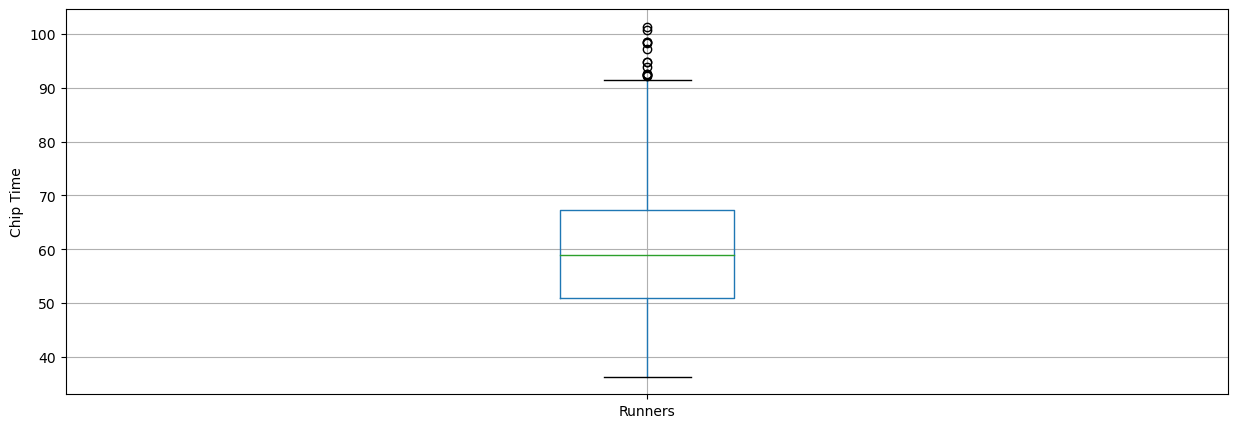

In [34]:
df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])


The second question to answer is: **Did the runners finish times follow a normal distribution?**

Below is a distribution plot of runners times plotted using the seaborn library. The distribution looks almost normal.

C:\Users\aiman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


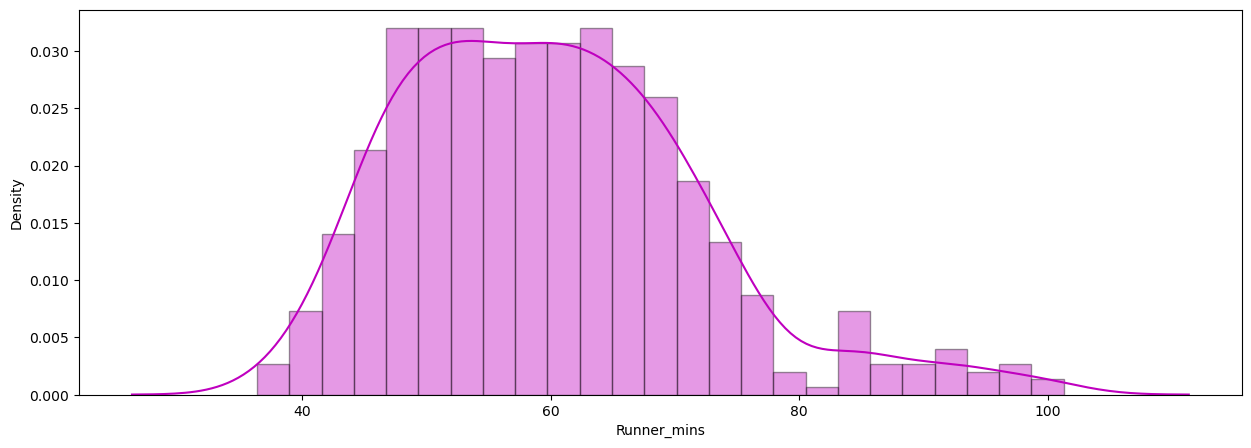

In [35]:
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()


The third question deals with **whether there were any performance differences between males and females** Below is a distribution plot of times for males and females.




C:\Users\aiman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aiman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


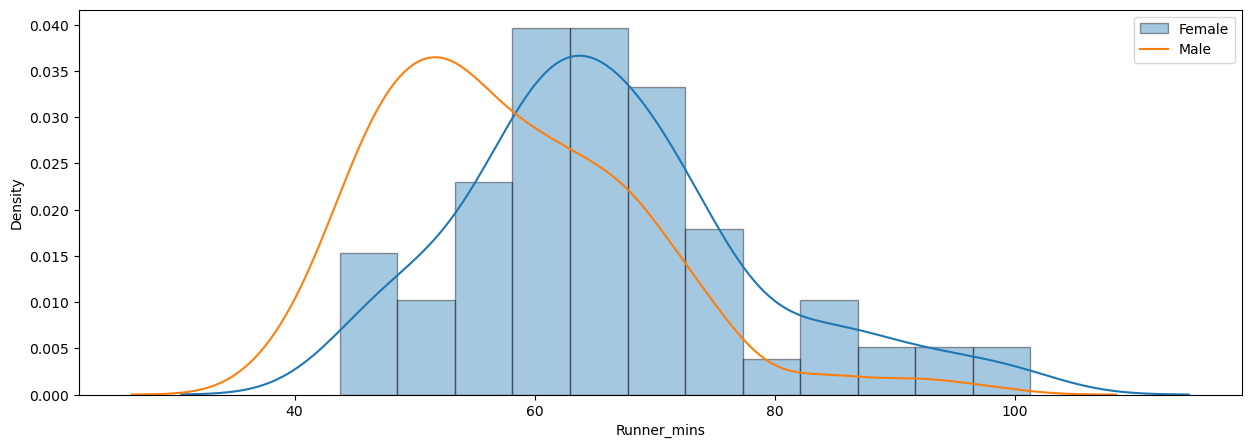

In [36]:
## Extracting the 'Runner_mins' values for female runners and assigning it to the variable 'f_fuko'
f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']

## Extracting the 'Runner_mins' values for male runners and assigning it to the variable 'm_fuko'
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']

sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()


The distribution indicates that females were slower than males on average. You can use the groupby() method to compute summary statistics for males and females separately as shown below.




In [37]:
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)


        Runner_mins                                                         \
              count       mean        std        min        25%        50%   
 Gender                                                                      
 F            163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
 M            414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                                
               75%         max  
 Gender                         
 F       72.058333  101.300000  
 M       64.804167   98.516667  


The average  time for all females and males was ~66 mins and ~58 mins, respectively. Below is a side-by-side boxplot comparison of male and female finish times.




Text(0.5, 0.98, '')

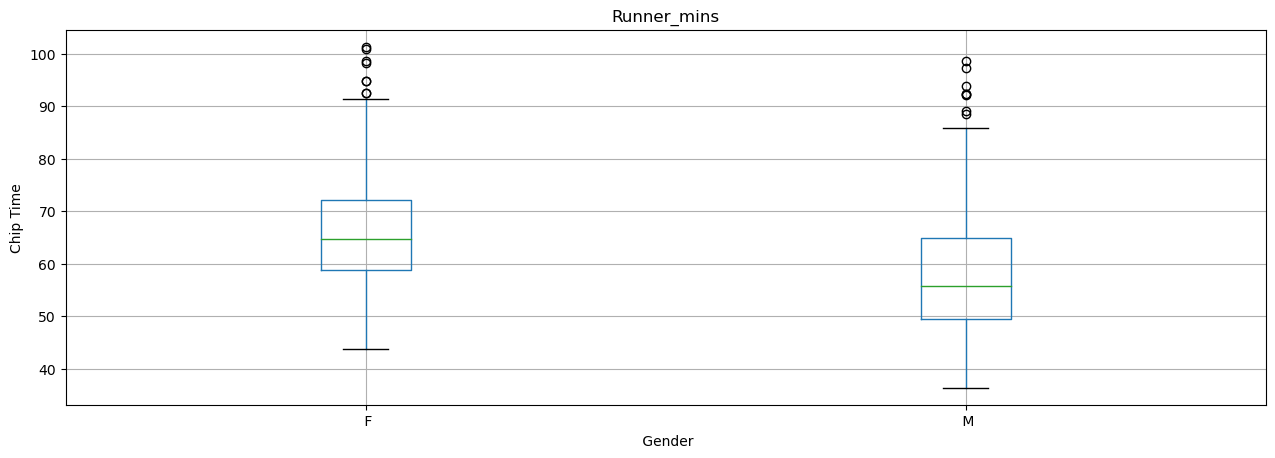

In [38]:
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")


# Conclusion

In this session, you performed web scraping using Python. You used the Beautiful Soup library to parse html data and convert it into a form that can be used for analysis. You performed cleaning of the data in Python and created useful plots (box plots, bar plots, and distribution plots) to reveal interesting trends using Python's matplotlib and seaborn libraries. After this session, you should be able to use Python to easily scrape data from the web, apply cleaning techniques and extract useful insights from the data.

